# COGS 118A - Final Project

# Machine Learning Applied to Stellar Classification

## Group members

- Grant Duntugan
- Jesse Sanchez Villegas
- Isabella Anderson
- Trent Barker

# 1. Abstract 

With profound advancements in the sensitivity of telescopes, we are learning more about stars and identifying new ones at an ever-increasing rate. Stellar spectral types cannot be directly determined; rather, indirect measurements of temperature by B-V color and luminosity by apparent magnitude (and absolute magnitude when distance from Earth to the star is known) may be used to classify the type of star and the stage of its lifetime it is in. In this project, our goal was to find a machine learning model able to accurately predict the type of star (giant or dwarf) given B-V color, spectral type, apparent magnitude, and distance from the Earth to the star (parallax). Using K-Nearest-Neighbors with `n_neighbors=5` as our baseline, we compared the performance of Random Forest, XGBoost, and SVM after running a gridsearch to find the optimal parameters. After determining the accuracy and auROC for each model, we found that KNN with `n_neighbors=3` performed the best with a testing accuracy of 97.4% and an fscore of 0.9725. XGBoost was a close second with a testing accuracy of 96.7% and an fscore of 0.9652. We found that KNN is the highest performing algorithm for this dataset since dwarf and giant stars tended to group together with other stars of the same classification, providing an ideal environment for the decision methods of the KNN algorithm.

# 2. Background

Stellar Classification background: Stars are classified based upon spectral characteristics including temperature and luminosity. Stars are first characterized by the Morgan-Keenan system by letters O B A F G K M, with O stars being the hottest and M stars being the coolest. There are well-defined temperature ranges that distinguish the types of stars: O stars have temperatures above 25,000K, B stars have ranges between 10,000 - 25,000 K, A stars between 7,500 -10,000 K, F stars 6,000 - 7,500 K, G stars (including the Sun) between 5,000 - 6,000 K, K stars between 3,500 - 5,000 K, and M stars have temperatures below 3,500 K. Letters are further divided into 10 more subclasses between 0-9 by temperature. For example, an A0 star is hotter than an A9 star. Finally, stars are classified by luminosity class, which determines a specific stage in the star's lifetime. A supergiant is denoted by Ia0, Ia, Iab, or Ib. A giant star has luminosity class II, III, or IV. The vast majority of stars are Main Sequence stars, which are called dwarf stars. Main sequence stars are denoted by the letter V. Additional dwarf classes are subdwarfs (denoted VI) and white dwarfs (VII). For example, our Sun is a G2V star which means it is a relatively hot G star on the main sequence. Another example is an K0III which is a giant hot K star.

For the sake of this project, a 'dwarf' star includes main sequence stars, subdwarfs, and white dwarfs. A 'giant' star includes supergiants and giants. While it would be ideal to try to predict the exact luminosity class (i.e. predict if a star is specifically a hypergiant or white dwarf or main sequence star etc), there is a disproportionate amount of data for the different spectral types. Since it is estimated that 90% of the stars in the universe are main sequence stars, stellar datasets are dominated by luminosity class 'V' stars and there are far less instances of other classes such as subgiants, giants, subdwarfs, etc. Therefore it makes more sense to group stars into the classes 'giant' and 'dwarf' to be able to have much more data to train and test on rather than splitting the dataset into sub-sets of different luminosity classes.

Our aim to find a machine learning system that can correctly classify stars as 'giant' or 'dwarf' has important applications to astronomy as it allows for stars to be quickly classified when observations of their B-V color or apparent magnitude and parallax are made. Taking these indirect measures of stars and using them to predict spectral type is important since we aren't able to directly measure the spectral type of stars. Due to the rapid influx of new observations from space-based and ground-based telescopes, it would be mind-numbing to have to classify each newly identified stellar body manually, which was how it was done for quite some time<a name="Mahalakshmi"></a>[<sup>[2]</sup>](#Mahalakshminote). As the number of our stellar observations explodes with the trend of big data, there is an ever growing need to find and develop classifier systems that are both accurate and efficient<a name="Kong"></a>[<sup>[3]</sup>](#Kongnote).

Being able to categorize stars on spectral features is an important concept in astronomy as it allows us to understand more about individual stars, stellar evolution, the environment surrounding these stars, and even estimating the viability of life on exoplanets that may orbit these stars. The importance of knowing stellar classification and its relation to habitability of exoplanets is of particular importance in the search for extraterrestrial life. It is thought that only stars of certain spectral types may promote an environment conducive to life in orbiting exoplanets, so understanding spectral types has very important applications in many domains of astronomy and astrophysics.


# 3. Problem Statement


We are trying to classify a star as a dwarf star or a giant star given indirect measures of its luminosity (apparent magnitude, absolute magnitude), and temperature (B-V color). Within the category 'dwarf' lies main sequence stars (the vast majority of stars are main sequence stars), red dwarfs, and white dwarfs. Within the category 'giant' lies supergiants, hypergiants, subgiants and giants. Since we are looking at stars and the chances of them extinguishing within our lifetime is essentially zero, observations should be replicable, and the star class is dependent on several variables but also with the star’s current stage of life. This means there can be different classifications of the same star given how far in time we replicate the problem, but given that stars live between 10 million years and 10s of billions of years, the results should be replicable in our lifetimes and many to come.

This problem is highly replicable as it may be applicable to any project that uses indirect telescopic measurements to try to classify stars based on spectral type. For example, one can determine whether a star is a dwarf or giant if temperature of the star and radius is known. This is an easy calculation if one has the data, but the issue is that the specific measures of radius and temperature are often very difficult to observe even with modern telescopes. B-V color, which is the difference in the B magnitude and visual magnitude of the star, is a good indicator of temperature and is far easier to measure than the actual temperature of the star. For example, the B-V index of a hot star is close to 0 or in the negatives, while the B-V color index of a cool star is closer to 2. Additionally, if we know the distance to the star from Earth (known as parallax, measured in parsecs (1pc = 2.086E16 m)) and the apparent magnitude of the star, we can determine the absolute magnitude of the star which is a good indicator of luminosity. A negative absolute magnitude means the star is very luminous (-10 is the most luminous/brightest) while an absolute magnitude near 15 is the faintest. Hence these two are indirect measures of spectral properties of stars and since they are easier to measure than things such as radius/temperature/mass etc, they provide an interesting way to predict spectral types in a far more accessible way.

# 4. Data
### 4.1 Data Cleaning


Our dataset will be from this link:
# https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs
There are 7 total variables and 39552 observations. Each observation consists of the following features:

- Vmag is the apparent magnitude of the star. 

- Amag (Absolute Magnitude) is a better measure of Vmag.

- Plx is parallax (distance between star and earth) in units of parsecs (3.086E19m)

- e_Plx is standard error of parallax, the dataset says to drop the row if the error is too high

- B-V color index is sort of a measure of temperature, so a really hot star has a B-V color near 0 and a very cool star has B-V color near 2.

- SpType Spectral Type of the star

- TargetClass(changing to Giant): 0 if dwarf, 1 if giant. A dwarf star would be V, VI, VII classifications. Giants would be Ia-0, Ia, Ib, Iab, II, III, IV.


The author of the dataset suggested that we use the standard error of parallax column to determine what error we deem too high, and drop the columns with errors greater than or equal to the value we chose as too high. An inaccurate measure of parallax may cause our calculations of absolute magnitude to also be inaccurate (as absolute magnitude is dependent on distance from the Earth to the star, i.e parallax), which could cause our model to wrongly classify dwarfs as giants and vice versa. 

The dataset we are putting to use required very little cleaning. There were no missing values present, so no rows needed to be removed due to such an issue. We determined it was ready to be put to use since each of the variables we needed to reliably classify a star was already present and needed no alterations to make it usable. As mentioned above an alteration to the data we did do is remove rows that had errors greater than our desired threshold.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Star39552_balanced.csv")

In [2]:
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1


Confirming there aren't any missing values below:

In [3]:
df.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

The code below removes of rows with error higher than our desired threshold. We also converted `SpType` to numerical values.

In [4]:
# dropping rows with e_Plx <= 1.5 
df = df[(df['e_Plx'] <= 1.5)]

# renaming Target class to Giant so it is easier to understand
df=df.rename(columns={"TargetClass":"Giant"})


## convert SpType column into categorical numerical values
SpType_le = LabelEncoder()  
df['SpType'] = SpType_le.fit_transform(df["SpType"])


df.shape

(35182, 7)

 
### 4.2 EDA

We are interested in being able to classify giants versus non-giants, so we thought it would be interesting to look at the distribution of our feature variables with respect to their classifications. Some of these features are spread relatively evenly and aren't great detectors on whether stars are giants or not.

(0.0, 50.0)

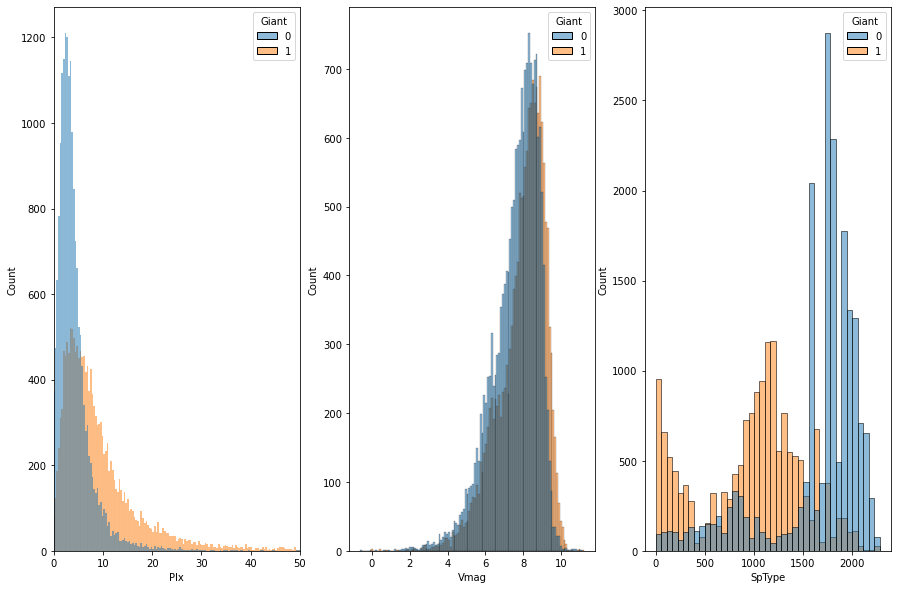

In [5]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,10))
sns.histplot(ax=axes[0], data= df, x="Plx", hue="Giant")
sns.histplot(ax=axes[1], data= df, x="Vmag", hue="Giant")
sns.histplot(ax=axes[2], data= df, x="SpType", hue="Giant")
axes[0].set_xlim([0,50])

An explanation for the distribution of `Vmag` for giants and dwarfs is that visual magnitude, also called apparent magnitude, is a measure of a star's brightness from Earth. Since many stars in our dataset are extremely far away, they appear to be much dimmer than they really are. `Amag`, *absolute* magnitude, is a measure of a star's brightness if it were located at a standard distance of 10pc away. Hence this is a much better measure of brightness, and we can see that the distributions for `Amag` overlap much less than for `Vmag`. Below are histograms of the distributions of `Amag` and `B-V` for giant and dwarf stars.

<AxesSubplot:xlabel='B-V', ylabel='Count'>

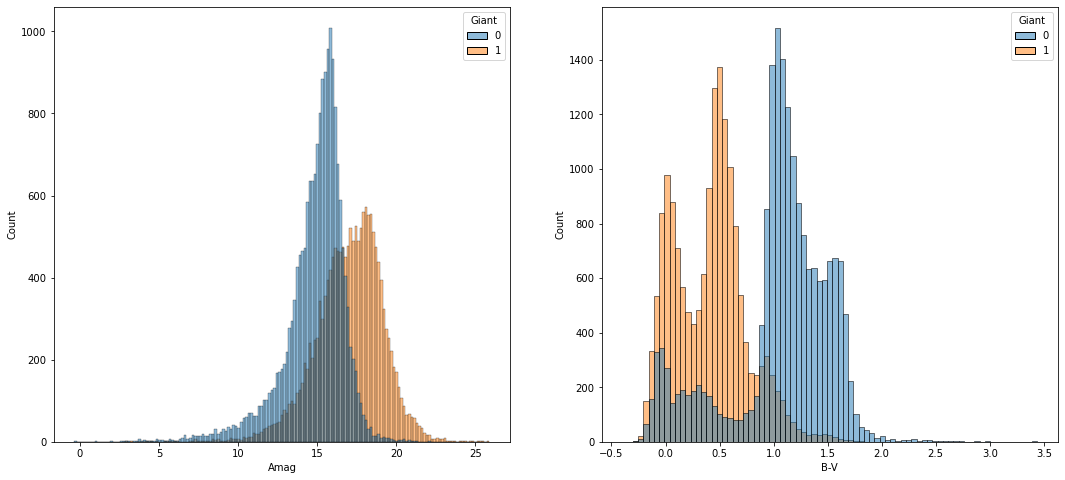

In [6]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18, 8))
sns.histplot(ax=axes[0], data= df, x="Amag", hue="Giant")
sns.histplot(ax=axes[1], data=df, x="B-V", hue="Giant")

Overall, there are some slight distribution differences between giants and non-giants (dwarfs), but it appears that the `B-V` color index and `Amag` could potentially separate giants from non-giants the most.

We can see that the data for absolute magnitude, `Amag`, for giants and non-giants appears to be normal. The distribution of `B-V` appears to be bimodal. Finally, we observe that `Plx` and `Vmag` are skewed normal.

### 4.3 Setup

In [7]:
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import zero_one_loss, accuracy_score, roc_auc_score, f1_score, auc, precision_recall_fscore_support
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


# Defining our features and target values
X = df[['Amag', 'Vmag', 'B-V', 'Plx', 'e_Plx', 'SpType']]
y = df[['Giant']].values.ravel()

# defining training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Use four folds for grid searches
kf = KFold(n_splits=4)

### 4.4 Determining if enough data to train/test/split

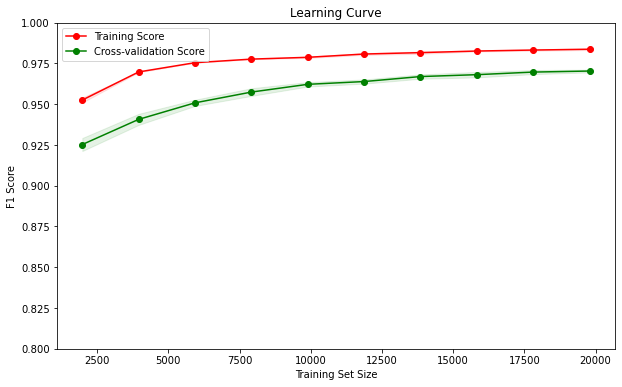

In [8]:
from sklearn.model_selection import learning_curve
# defining base model
model = KNeighborsClassifier(n_neighbors=3)

# defining the range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# calculating the learning curve scores using cross-validation
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=4, train_sizes=train_sizes, scoring='f1')

# calculating the mean and standard deviation of the scores at each training set size
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# plotting learning curve
plt.figure(figsize=(10,6))
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.ylim(0.0, 1.0)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training Score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g',
         label='Cross-validation Score')
plt.legend(loc='best')

#Changing the y range since there is blank space from 0 to .8 
plt.ylim(.8, 1)
plt.show()



What we can interpret from this learning curve in the graph above is that the scores are converging at a larger setsize which means that the model is performing well and we have enough data to do a train/validate/test split. At first, we see that there is a considerable gap between the training score and the cross validation score meaning our model was overfitting at the smaller data size, but, as we increased our datasize, the gap reduces in size, meaning it is getting better at generalizing and achieving higher scores on the cross-validation set. Therefore, our other models should use a train/test/split to get the best performing model. Note that each model has their advantages to different data sizes, so we are using our benchmark model as our learning curve test and assuming this result applies the same to the other models. 

# 5. Proposed Solution

We plan to use a KNN algorithm with `n_neighbors=5` as our benchmark model. Previous examinations on this dataset have revealed that this yields the highest accuracy<a name="Nabil"></a>[<sup>[6]</sup>](#Nabil). Because stars are classified based on physical features, we believe that similar stars will have similar features, which will work well for KNN. The reason for this is because in general stars are classified by their features such apparent/absolute magnitude as well as B-V color which is an indication of temperature. So stars with the same features should be classified the same and thus KNN works ideal here as we should be able to plot out our stars and find that the most similar stars closest to it should be of the same class.

We plan to use the Random Forest algorithm since it has been known to perform very well on various stellar classification problems<a name="Kong"></a>[<sup>[5]</sup>](#Saifuddin). We also believe that SVMs are able to distinguish between categorical classes well based on ordinal variables. Since our data consists of ordinal variables and star classes can be distinguished based on their features with the exception of special cases, SVMs can be applied and so we believe this will be a good competitor against the benchmark algorithm. Finally, we will test a XGBoost model in attempt to see if any of these models can perform better than our benchmark. 

In order to test our models, we plan to split our data into fourths for training  and testing. We plan to test our model using K-fold cross validation within these sets to have our model generalize well. In order to find the best performing n_neighbors for KNN, we intend to use a grid search. For Random Forest, we plan to test on the parameters that deal with the maximum depth, split quality, and the number of estimators and find which combination works best through a grid search as well. For SVMs, we plan to use grid search on the kernel and degree.

Similar (yet different) machine learning projects that sought to classify bright bodies as stars, galaxies, or quasars used Random Forest, so we plan to compare the performance of KNN, SVM, Random Forest, and XGBoost to determine which algorithm/model performs better using accuracy, precision, recall, fscore, as our metrics.

The general plan is as follows:
1. Clean the dataset using pandas (see Data section)
2. Split the dataset into training and testing sets
3. Run GridSearch to find best hyperparameters for each algorithm
4. Test the best performing model for each algorithm on the testing set
4. Plot ROC curves and confusion matrices for each best model for each algorithm
5. Compare algorithms using testing accuracy

# 6. Evaluation Metrics

Because there are no repercussions to misclassifying a star, we want to do as best as we can in identifying dwarf stars correctly and identifying non-dwarf stars correctly. One evaluation metric we can use is accuracy. Our data is balanced and there are 19776 'giant' stars and 19776 'dwarf' stars, and since neither false positives nor false negatives are particularly costly in our problem, accuracy may provide a good metric for us to evaluate our model. Since we do not need to minimize false positives or false negatives due to them being costly, precision and recall may not be appropriate methods.

Accuracy is the most appropriate evaluation metric in this case, and it provides a simple way to compare the performance of different machine learning algorithms (KNN, Random Forest, SVM). In addition to this we will plot the ROC in order to get AUC when possible. 

# 7. Models & Results 

## 7.1 KNN model

In [9]:
params = {
    'n_neighbors' : [3, 5, 15, 25, 50],
    'weights' : ['uniform', 'distance']
}
clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=kf)
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 15, 25, 50],
                         'weights': ['uniform', 'distance']})

In [10]:
result_rankings = clf.cv_results_['rank_test_score']
for i in range(1, 4):
    index = np.where(result_rankings == i)[0][0]
    print(clf.cv_results_['params'][index])
    print(clf.cv_results_['mean_test_score'][index])
    print(clf.cv_results_['std_test_score'][index])

{'n_neighbors': 3, 'weights': 'distance'}
0.9736224270583327
0.0008356062808528384
{'n_neighbors': 5, 'weights': 'distance'}
0.9729023051347466
0.0015286495326700383
{'n_neighbors': 3, 'weights': 'uniform'}
0.9717653672815427
0.0008106981379014999


By looking at the top three test scores, we can see that these choices of parameters perform roughly the same amount with a difference of less than a percent. Because of this, we can assume that all these choices of neighbors and weights will perform roughly equally. We can choose the first place performer arbitrarily and examine the results further. The parameters we will settle with are 3 neighbors with a distance weight.

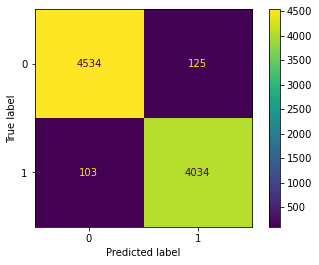

In [11]:
best_estimator = clf.best_estimator_
y_pred = best_estimator.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Note: The following code was adapted/obtained from this stack overflow thread: https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

In [12]:
print("Test set accuracy: {:.4f}".format(best_estimator.score(X_test, y_test)))
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Test set precision: {:.4f}".format(precision))
print("Test set recall: {:.4f}".format(recall))
print("Test set fscore: {:.4f}".format(fscore))

Test set accuracy: 0.9741
Test set precision: 0.9699
Test set recall: 0.9751
Test set fscore: 0.9725


In [13]:
y_scores = best_estimator.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

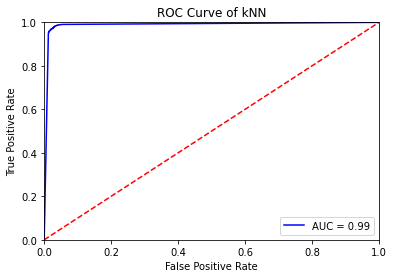

In [14]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

As displayed above, our best KNN model performed very well. With a Test set accuracy of 97.41%, this model approaches perfect performance, leaving little else to be desired. While we had decided on a benchmark of KNN with `n_neighbors=5`, the gridsearch revelaed a higher accuracy with the `n_neighbors=3` model. Thus we have outperformed our benchmark with the same model type but using different parameters.

## 7.2 Random Forest


In [15]:
params = {
    'n_estimators' : [10, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 5, 10]
}
clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=kf)
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10], 'n_estimators': [10, 100]})

In [16]:
result_rankings = clf.cv_results_['rank_test_score']
for i in range(1, 4):
    index = np.where(result_rankings == i)[0][0]
    print(clf.cv_results_['params'][index])
    print(clf.cv_results_['mean_test_score'][index])
    print(clf.cv_results_['std_test_score'][index])

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
0.9081710250988811
0.0012950875604483684
{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
0.9079057702414121
0.0010957280963231496
{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 10}
0.9072994225373773
0.0033228346325553035


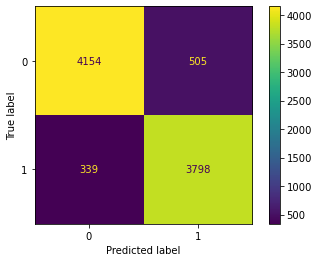

In [17]:
best_estimator = clf.best_estimator_
y_pred = best_estimator.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [18]:
print("Test set accuracy: {:.4f}".format(best_estimator.score(X_test, y_test)))
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Test set precision: {:.4f}".format(precision))
print("Test set recall: {:.4f}".format(recall))
print("Test set fscore: {:.4f}".format(fscore))

Test set accuracy: 0.9040
Test set precision: 0.8826
Test set recall: 0.9181
Test set fscore: 0.9000


In [19]:
y_scores = best_estimator.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

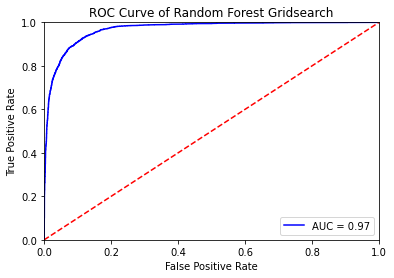

In [20]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest Gridsearch')
plt.show()

Looking at our test metrics we found that our Random Forest model has a high accuracy score of roughly 90%, and a precision score of 0.88. While this is not terrible performance by any means, it still has some room to improve due to it having a fair amount of misclassifications, so we will look at more model types to see if we can outperform Random Forest.

## 7.3 XGBoost

In [21]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
xgboost = xgb.XGBClassifier()

pipe=Pipeline([('scaler', StandardScaler()), ('xgb',XGBClassifier())])

In [23]:
param_grid={'xgb__n_estimators': [5, 7, 10], 'xgb__max_depth': [5, 6, 10, 15],
           'xgb__learning_rate': [0.3, 0.5, 0.7],
           'xgb__objective':['binary:logistic']}

grid_xgb=GridSearchCV(pipe, param_grid, cv=4)
grid_xgb.fit(X_train, y_train)

accuracy_xgb=grid_xgb.best_estimator_.score(X_test, y_test)

In [24]:
result_rankings = grid_xgb.cv_results_['rank_test_score']
for i in range(1, 4):
    index = np.where(result_rankings == i)[0][0]
    print(grid_xgb.cv_results_['params'][index])
    print(grid_xgb.cv_results_['mean_test_score'][index])
    print(grid_xgb.cv_results_['std_test_score'][index])

{'xgb__learning_rate': 0.7, 'xgb__max_depth': 15, 'xgb__n_estimators': 10, 'xgb__objective': 'binary:logistic'}
0.9636171326474454
0.002001417425608576
{'xgb__learning_rate': 0.5, 'xgb__max_depth': 15, 'xgb__n_estimators': 10, 'xgb__objective': 'binary:logistic'}
0.9606230258567097
0.00210502046786849
{'xgb__learning_rate': 0.7, 'xgb__max_depth': 15, 'xgb__n_estimators': 7, 'xgb__objective': 'binary:logistic'}
0.9605472338300308
0.0018145661632860666


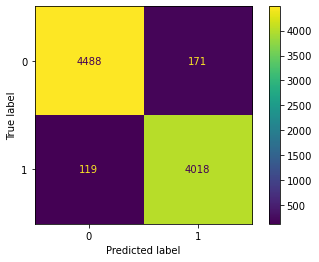

In [25]:
best_estimator = grid_xgb.best_estimator_
y_pred = best_estimator.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [26]:
print("Test set accuracy: {:.4f}".format(best_estimator.score(X_test, y_test)))
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Test set precision: {:.4f}".format(precision))
print("Test set recall: {:.4f}".format(recall))
print("Test set fscore: {:.4f}".format(fscore))

Test set accuracy: 0.9670
Test set precision: 0.9592
Test set recall: 0.9712
Test set fscore: 0.9652


In [27]:
y_scores = best_estimator.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

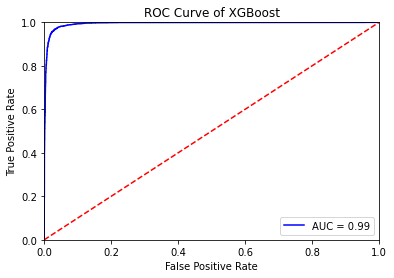

In [28]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of XGBoost')
plt.show()

## 7.4 SVM Model

In [29]:
pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('svm', SVC())])

params = {'svm__C': [0.1, 1, 10], 
              'svm__kernel': ['rbf', 'sigmoid']}
grid_svm = GridSearchCV(pipeline, param_grid=params, cv=kf, verbose=3)
grid_svm.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4] END .......svm__C=0.1, svm__kernel=rbf;, score=0.884 total time=   6.4s
[CV 2/4] END .......svm__C=0.1, svm__kernel=rbf;, score=0.881 total time=   7.1s
[CV 3/4] END .......svm__C=0.1, svm__kernel=rbf;, score=0.888 total time=   7.2s
[CV 4/4] END .......svm__C=0.1, svm__kernel=rbf;, score=0.885 total time=   6.7s
[CV 1/4] END ...svm__C=0.1, svm__kernel=sigmoid;, score=0.804 total time=   9.1s
[CV 2/4] END ...svm__C=0.1, svm__kernel=sigmoid;, score=0.794 total time=   8.8s
[CV 3/4] END ...svm__C=0.1, svm__kernel=sigmoid;, score=0.793 total time=   9.3s
[CV 4/4] END ...svm__C=0.1, svm__kernel=sigmoid;, score=0.788 total time=   8.7s
[CV 1/4] END .........svm__C=1, svm__kernel=rbf;, score=0.885 total time=   6.5s
[CV 2/4] END .........svm__C=1, svm__kernel=rbf;, score=0.883 total time=   6.4s
[CV 3/4] END .........svm__C=1, svm__kernel=rbf;, score=0.889 total time=   6.9s
[CV 4/4] END .........svm__C=1, svm__kernel=rbf;,

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [30]:
result_rankings = grid_svm.cv_results_['rank_test_score']
for i in range(1, 4):
    index = np.where(result_rankings == i)[0][0]
    print(grid_svm.cv_results_['params'][index])
    print(grid_svm.cv_results_['mean_test_score'][index])
    print(grid_svm.cv_results_['std_test_score'][index])

{'svm__C': 10, 'svm__kernel': 'rbf'}
0.8872509491928677
0.002206620471774908
{'svm__C': 1, 'svm__kernel': 'rbf'}
0.8857728725306806
0.001894114974166446
{'svm__C': 0.1, 'svm__kernel': 'rbf'}
0.8842569630534782
0.0026502618232228463


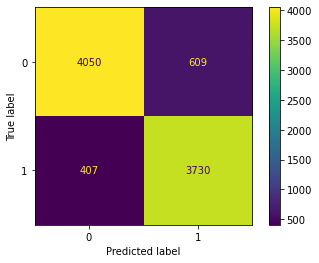

In [31]:
best_estimator = grid_svm.best_estimator_
y_pred = best_estimator.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [32]:
print("Test set accuracy: {:.4f}".format(best_estimator.score(X_test, y_test)))
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Test set precision: {:.4f}".format(precision))
print("Test set recall: {:.4f}".format(recall))
print("Test set fscore: {:.4f}".format(fscore))

Test set accuracy: 0.8845
Test set precision: 0.8596
Test set recall: 0.9016
Test set fscore: 0.8801


In [33]:
# note: no roc curve for svm because our model is not classified based on probability

In this confusion matrix generated by our highest performing SVM model, it is apparent that it is the least effective model choice presented so far. With a test set accuracy of only 84.97%, a fair amount of our dataset is being misclassified. Given this is after a gridsearch, there is sufficient evidence and reason to say that an SVM modeling approach to this dataset will likely not be in our best interest. It is worth noting that the performed gridsearch was not as thorough as it could have been, for this was due to the interest of having the code finish running within a reasonable amount of time.

# 8. Discussion

### Interpreting the result

The K-nearest-neighbors algorithm is the best performing algorithm for this stellar classification task. Overall, the K-nearest-neighbors algorithm was the best performing algorithm out of the three algorithms with a test set accuracy of 97.4% using our best model with hyperparameters `n_neighbors=3` and `weights='distance'`. Our model uses two less neighbors and performs within 1% of the benchmark `n_neighbors=5`. Our model also achieved an f-score of 0.9725 and an AUC of 0.99, which indicates that our model does fairly well in both precision and recall scores (roughly 0.97 in each category).

XGBoost proved to excel in classifying dwarf and giant stars. After finding the optimal parameters through a grid search, we reached an accuracy of 96.7% which is less than 1% away from our baseline KNN. Further, the area under the ROC curve for XGBoost is 0.99, equivalent to that of KNN. Thus we found that XGBoost has the potential to be competitive with the K-Nearest-Neighbors algorithm. The precision, recall, and f1 scores for XGBoost were roughly 96%-97%, very close to the scores for KNN. 

The Random Forest algorithm, while not the best performing in our experiment, performed moderately well at our stellar classification task. It was able to achieve a test set accuracy of 90.6%, higher than SVM but lower than KNN and XGBoost. One issue, however, was that it had a slightly low precision score of 0.88 compared to our KNN and XGBoost model which had a precision and recall score at around roughly 0.97. The parameters we used were `criterion ='entropy'`, `max_depth=10`, and `n_estimators=100`.

Support Vector Machines are likely not a great pick for this task. While we initially believed they would work well on this classification problem due to being flexible around ordinal variables, it was only able to achieve a test set accuracy of 88.45%. This is less accurate than our other algorithms. However, it is possible that the reason we were unable to find a suitable model using SVM was due to time constraints. Finding a model using Grid Search proved to take a large amount of time per run and we had to cut down on the number of hyperparameters to search through. There may be a combination of hyperparameters that works better that we have not discovered in this project. Furthermore, we were working with a multi-dimensional feature space and it was difficult to visualize the data in that way. Upon plotting the data in three dimensions, it did not appear to be separable. Since we were not able to determine if our data is separable in higher dimensions through visualization, the poor performance of the model may imply that the multi-dimensional distribution of data was not appropriate for this algorithm.

### Limitations

One issue that we had was the amount of time it took to run model selection for the Random Forest and SVM algorithms. Especially with the SVM algorithm, running each model could take a full minute. We initially wanted to test the possibility of around 48 different models, but it was not practical to consistently re-run our program everytime we wanted to add or change a hyperparameter. Originally for one CV fold it took 73 minutes. In response, we limited our folds to reduce the amount of time it would take to test different parameters. We also considered using Randomized Search, but because it took so much time to complete one model, we felt that we wouldn't be able to gain a representative distribution using the number of hyperparameters we wanted to test in a reasonable amount of time.

### Ethics & Privacy

Given that our data and results are solely related to stars, we do not foresee potential ethical issues that would result in negative outcomes for other people. The dataset we are using is also public, so there should be no privacy concerns with the data either.

One potential concern could be the use of our results in the future. If the decisions of space travel are dependent upon the classification of stars in the future, the accuracy of our model would be important for deciding where to go. For this reason, we would like to note that we did not have space travel in mind when working on this project, and this model should not be used for decisions that could impact people's lives.

### Conclusion

Originally, we believed that the K-Nearest-Neighbors model with `n_neighbors=5` would be best for stellar classification, hence why we chose it as our benchmark. Since our two classes appeared to be clumped together, we thought that a higher value for `n_neighbors` would yield a more accurate majority vote.However, our results indicated that the KNN model with `n_neighbors=3` is the best performer, although arbitrarily since the accuracy is within 1% of our benchmark's. Since both `n_neighbors=3` and `n_neighbors=5` scored so similarly, it is reasonable to conclude that testing each on larger datasets could either reveal the true performance discrepancy or show that their performances average out to be the same. XGBoost performed extremely well, reaching an accuracy only 0.7% away from KNN and an auROC equivalent to that of KNN for `n_neighbors=3`. Therefore, it appears that XGBoost is competitive with KNN in both accuracy and area under the ROC, our two most important evaluation metrics. The less-than-stellar performance of Random Forest and SVM imply that they are not the best models for stellar classification tasks. 

We would like to highlight that the reason for KNN outperforming Random Forest and SVM is because stellar classes have similar features which falls in line with how a KNN model makes its decisions by predicting data points with similar features to the same class type. Random Forests may not have done as well as KNN due to some features having considerable overlap which could have prevented tree nodes from making distinct divisions in the data. The lack of success of the SVM models could be attributed to a variety of reasons, such as the data not being linearly separable, our sparse feature count, and the reduced efficiency of testing more hyperparameters. With that said, if people would want to use this as a basis for future work, please take note that our classification was simplified to only giant star and dwarf star, when in reality there are more classifications to stellar classes, so a different model type may need to be applied to test which performs better on other datasets. 

# Footnotes
<a name="absmag"></a>1.[^](#absmag):  (Undated) Absolute Magnitude. *Swinburne Centre for Astrophysics and Supercomputing*. https://astronomy.swin.edu.au/cosmos/a/Absolute+Magnitude<br> 
<a name="Mahalakshminote"></a>2.[^](#Mahalakshmi):Mahalakshmi G S, Swadesh B, Aswin RRV et al. (29 Aug 2022) Classification and Feature Prediction of Star, Galaxies, Quasars, and Galaxy Morphologies Using Machine Learning, PREPRINT (Version 1) https://doi.org/10.21203/rs.3.rs-1885343/v1<br> 
<a name="Kongnote"></a>3.[^](#Kong):Kong, Linghe, et al. Big Data in Astronomy, ScienceDirect, 2020, https://doi.org/10.1016/C2018-0-04415-1.<br> 
<a name="Wikipedianote"></a>4.[^](#Wikipedia):”Stellar Classification” Wikipedia, The Free Encyclopedia, Wikimedia Foundation, 15 Feb 2023, https://en.wikipedia.org/wiki/Stellar_classification<br> 
<a name="Saifuddin"></a>5.[^](#Saifuddin):Saifuddin, Mohammed. (25 Dec 2022) Stellar Classification: A Machine Learning Approach. https://towardsdatascience.com/stellar-classification-a-machine-learning-approach-5e23eb5cadb1
<a name="Nabil"></a>6.[^](#Nabil):Nabil, Dina (Sept 2022) Classification Models. https://www.kaggle.com/code/dinanabil811/classification-models